****Projet 2 OpenClassRooms :Parcours Data Scientist****

*Analysez des données de systèmes éducatifs*

## **Partie 1** : Description du projet et Contexte de l’analyse


Réalisation d'une analyse pré-exploratoire des données du domaine de l'éducation de la Banque mondiale, dans le but d'un projet d’expansion à l’international de notre start-up **academy**.
Les informations à retirer de cette étude sont :


*   Quels sont les pays avec un fort potentiel de clients pour nos services ?
*   Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
*   Dans quels pays l'entreprise doit-elle opérer en priorité ?

# Environnement et préparation

## *Importing Libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Les set pour l'affichage des Datas
pd.set_option("display.max_colwidth",1000)
#Pour tout afficher sur les liste je choisi la fonction set_option 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

## Importing Datas: from World Bank Open Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Télécharger toutes les Datas
df_Country= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Projet+Python_Dataset_Edstats_csv/EdStatCountry.csv',sep=';')
df_Country_series= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv', sep=',')
df_Data_Ed= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv', sep=(','))
df_Data_Note= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv', sep=(','))
df_Data_Series= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv', sep=(','))

In [ ]:
#Copies de nos dataFrame de base
Country = df_Country.copy()
Country_series = df_Country_series.copy()
Data_Ed = df_Data_Ed.copy()
Data_Note = df_Data_Note.copy()
Data_Series = df_Data_Series.copy()

# **Partie 2**: Présentation du jeu de données

Dans cette partie, on regarde nos data pour voir les valeurs qui nous intéressent dans chaque data.

## EdStat.csv: Data_Ed

In [ ]:
Data_Ed.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Taille

In [ ]:
#la taille
Data_Ed.shape


(886930, 70)

In [ ]:
Data_Ed.duplicated().sum() # détecter duplicatas


0

On a 886930 lignes et 70 colonnes.

### Variables qualitatives/Variables quantitatives

In [ ]:
Data_Ed.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
#renommer les valeurs à garder 
Data_Ed = Data_Ed.rename(columns={'Country Code': 'Country_code', 'Country Name': 'Country_Name','Indicator Name':'Indicator_Name','Indicator Code':'Indicator_Code'})


On peux classer nos colonnes en 3 classes:


*   les noms des pays et leurs codes
*   les noms des indicateurs  et leurs codes
*   les valeurs de chaque indicateur entre 1970 et 2100

In [ ]:
#les types de valeurs de nos classes
Data_Ed.dtypes.value_counts() 

float64    66
object      4
dtype: int64

Conclusion 

*   **Variables qualitatives**: 4 variables de types objets sont:les pays,code_pays, Indicateurs,codes_indicateurs
*   **Variables quantitatives**: 66 variables de type Float correspendent aux Variables années (1970-2100)

### Les valeurs manquantes 

In [ ]:
Data_Ed.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

On remarque que les nombres des lignes de chaque Variables sont différents, donc, on a des données manquantes pour ces valeurs.


In [ ]:
#Taux de valeurs manquantes sur notre data
(Data_Ed.isna().sum()/Data_Ed.shape[0]).sort_values(ascending=True)


Country_Name      0.000000
Country_code      0.000000
Indicator_Name    0.000000
Indicator_Code    0.000000
2010              0.726650
2005              0.792421
2000              0.800801
2012              0.833962
2011              0.835374
2009              0.839775
2006              0.841800
2013              0.844961
2007              0.845228
2008              0.848481
1995              0.851892
2015              0.852234
2003              0.853018
2004              0.854764
1990              0.859735
2002              0.859961
2001              0.860745
1999              0.866011
2014              0.871705
1985              0.898193
1980              0.899516
1975              0.901564
1998              0.904261
1994              0.912663
1996              0.913401
1993              0.914545
1992              0.914826
1991              0.916073
1997              0.917183
1970              0.918496
2040              0.942007
2025              0.942007
2090              0.942007
2

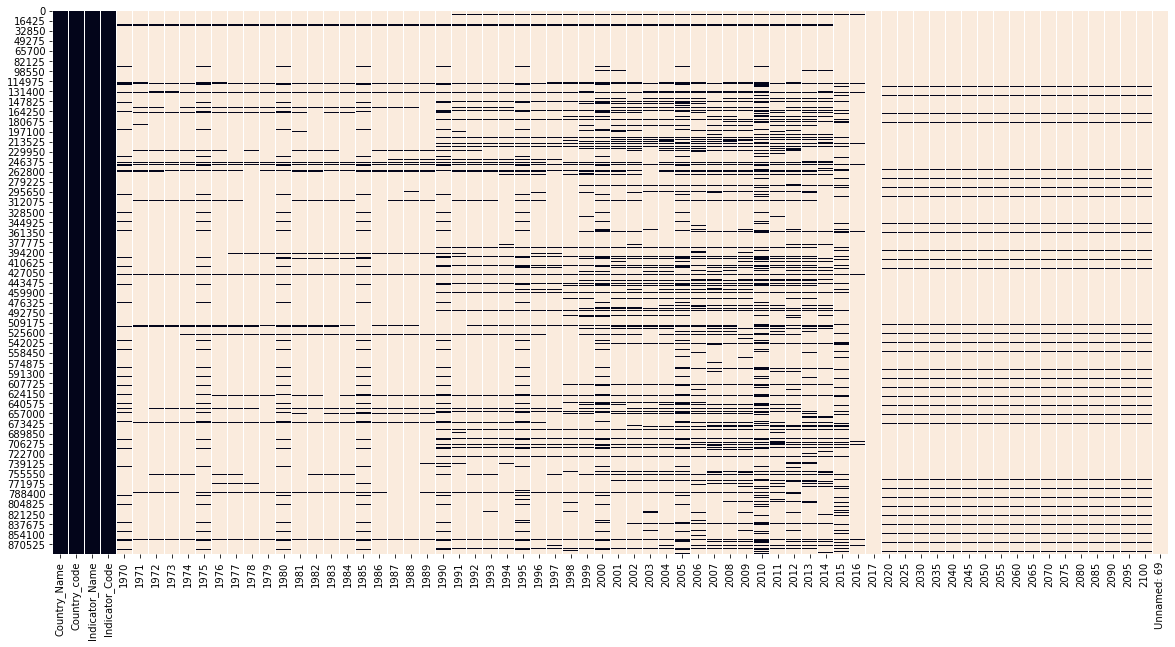

In [ ]:
# le heatmap des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(Data_Ed.isna(), cbar=False)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


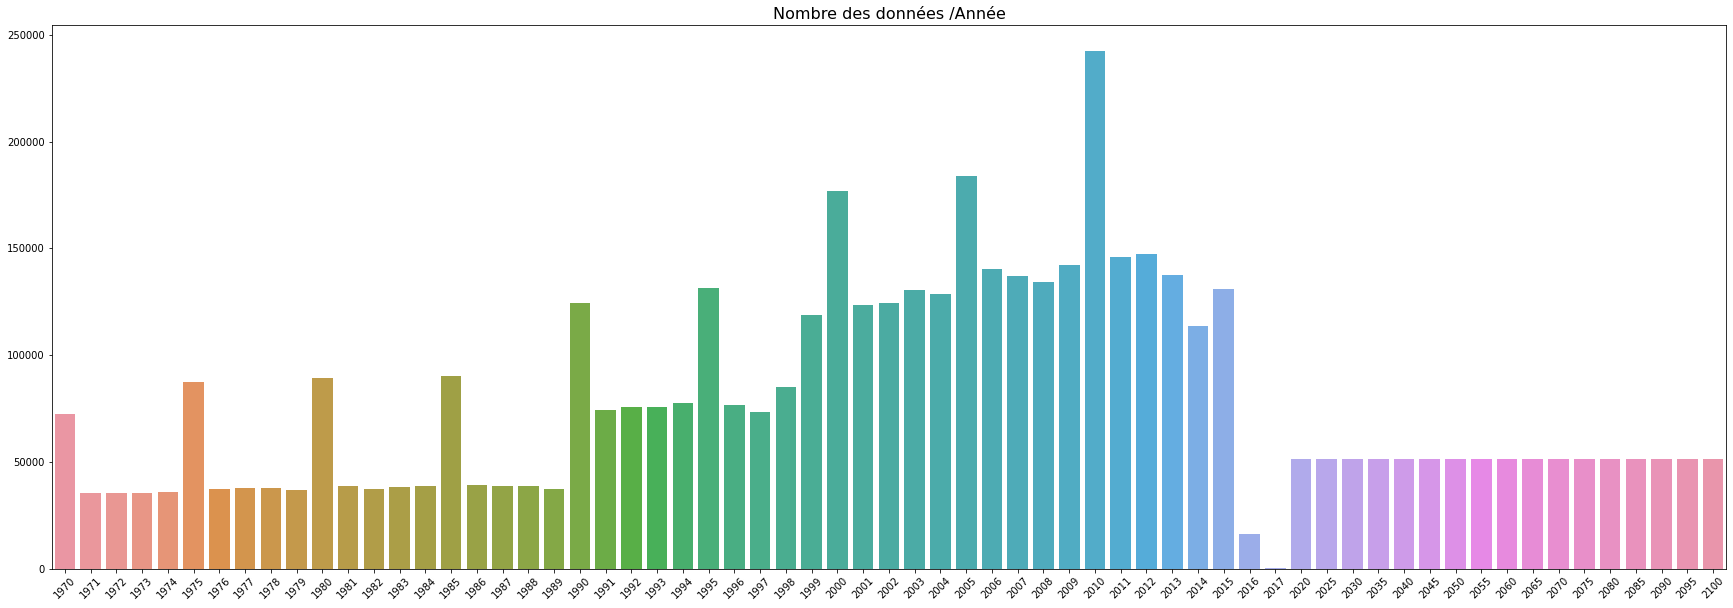

In [ ]:
year_count  = Data_Ed.loc[:,"1970":"2100"].notnull().sum()
plt.figure(figsize=(30,10))
plt.title('Nombre des données /Année',size=16)
sns.barplot(year_count.index, year_count.values)
plt.xticks(rotation=45)# rotation car les années ne sont visibles sur la ligne des X
plt.show()

D'après les deux graphes, on remarque que pour les :


*   **Variables qualitatives**: pas de Variables manquantes
*   **Variables quantitatives**: le taux varie entre 72% à 99%. On distingue 3 groupes d'années. L'année 2017 est complètement vide. 


1.   *Années passées* :1970-1998 :moyennement de valeurs manquantes
2.   *Années Présents* :1999-2017: peu de valeurs manquantes
3.   *Années Futures*: 2020-2100: beaucoup de valeurs manquantes
  







/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


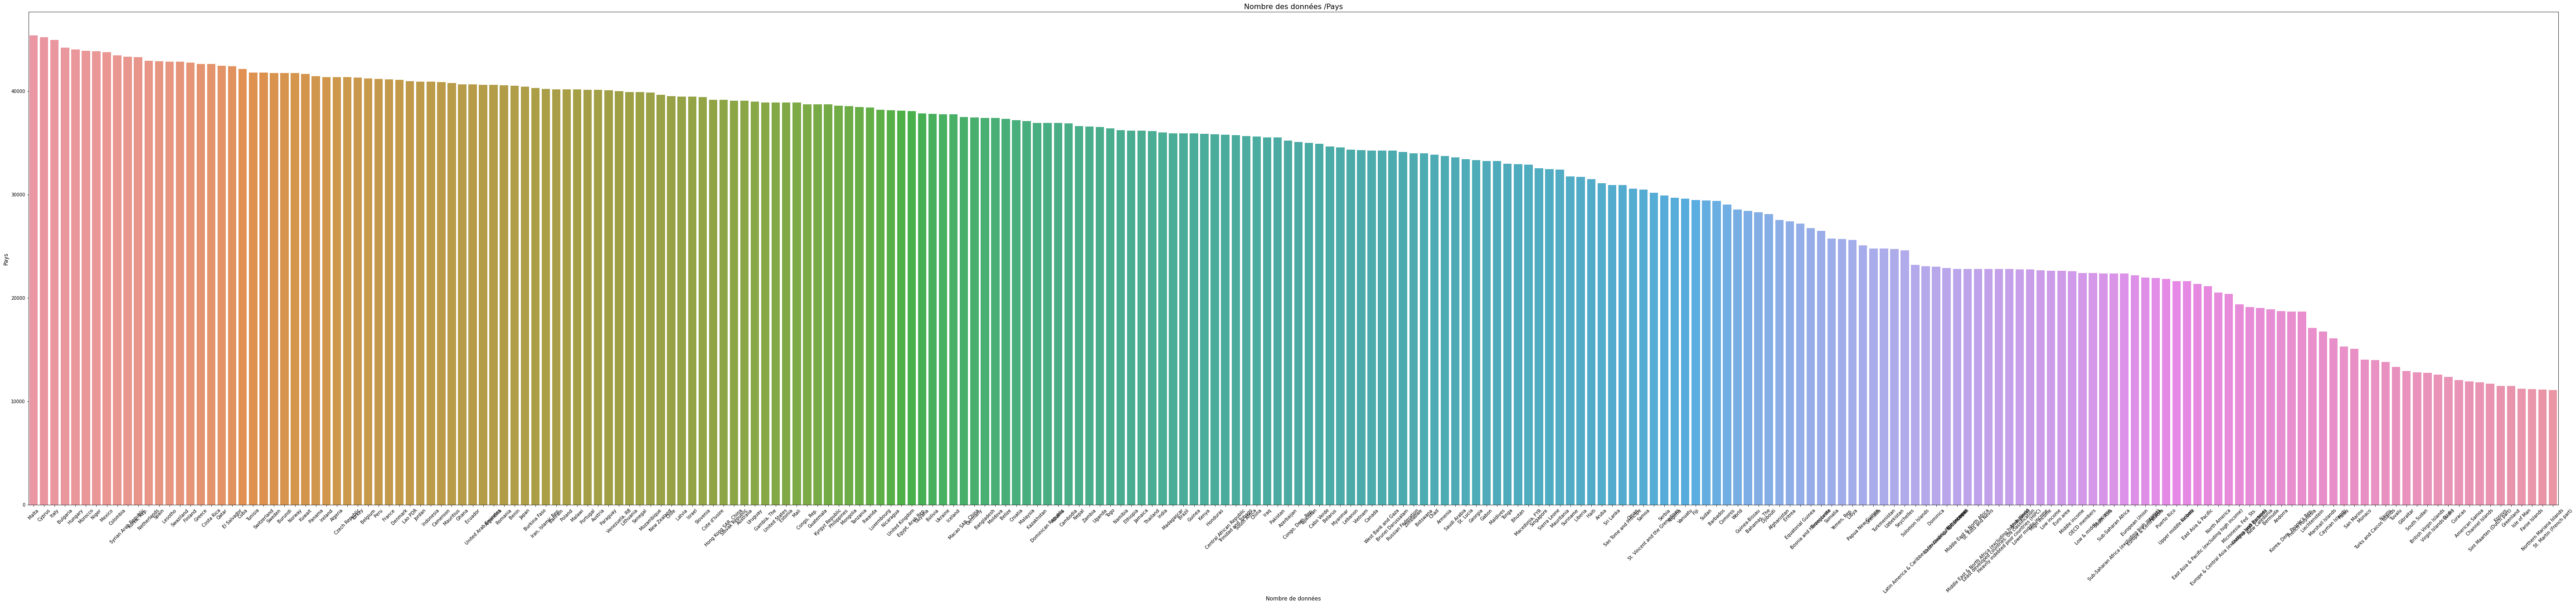

In [ ]:
Daf_country = Data_Ed.groupby('Country_Name').count().sum(axis=1).sort_values(ascending=False)
#Daf_country_premier=Daf_country.iloc[:20] #les 100 premiers

plt.figure(figsize=(100,20))
sns.barplot(Daf_country.index,Daf_country.values  )
plt.title('Nombre des données /Pays', size=16)
plt.ylabel('Pays' ,fontsize=12)
plt.xlabel('Nombre de données', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


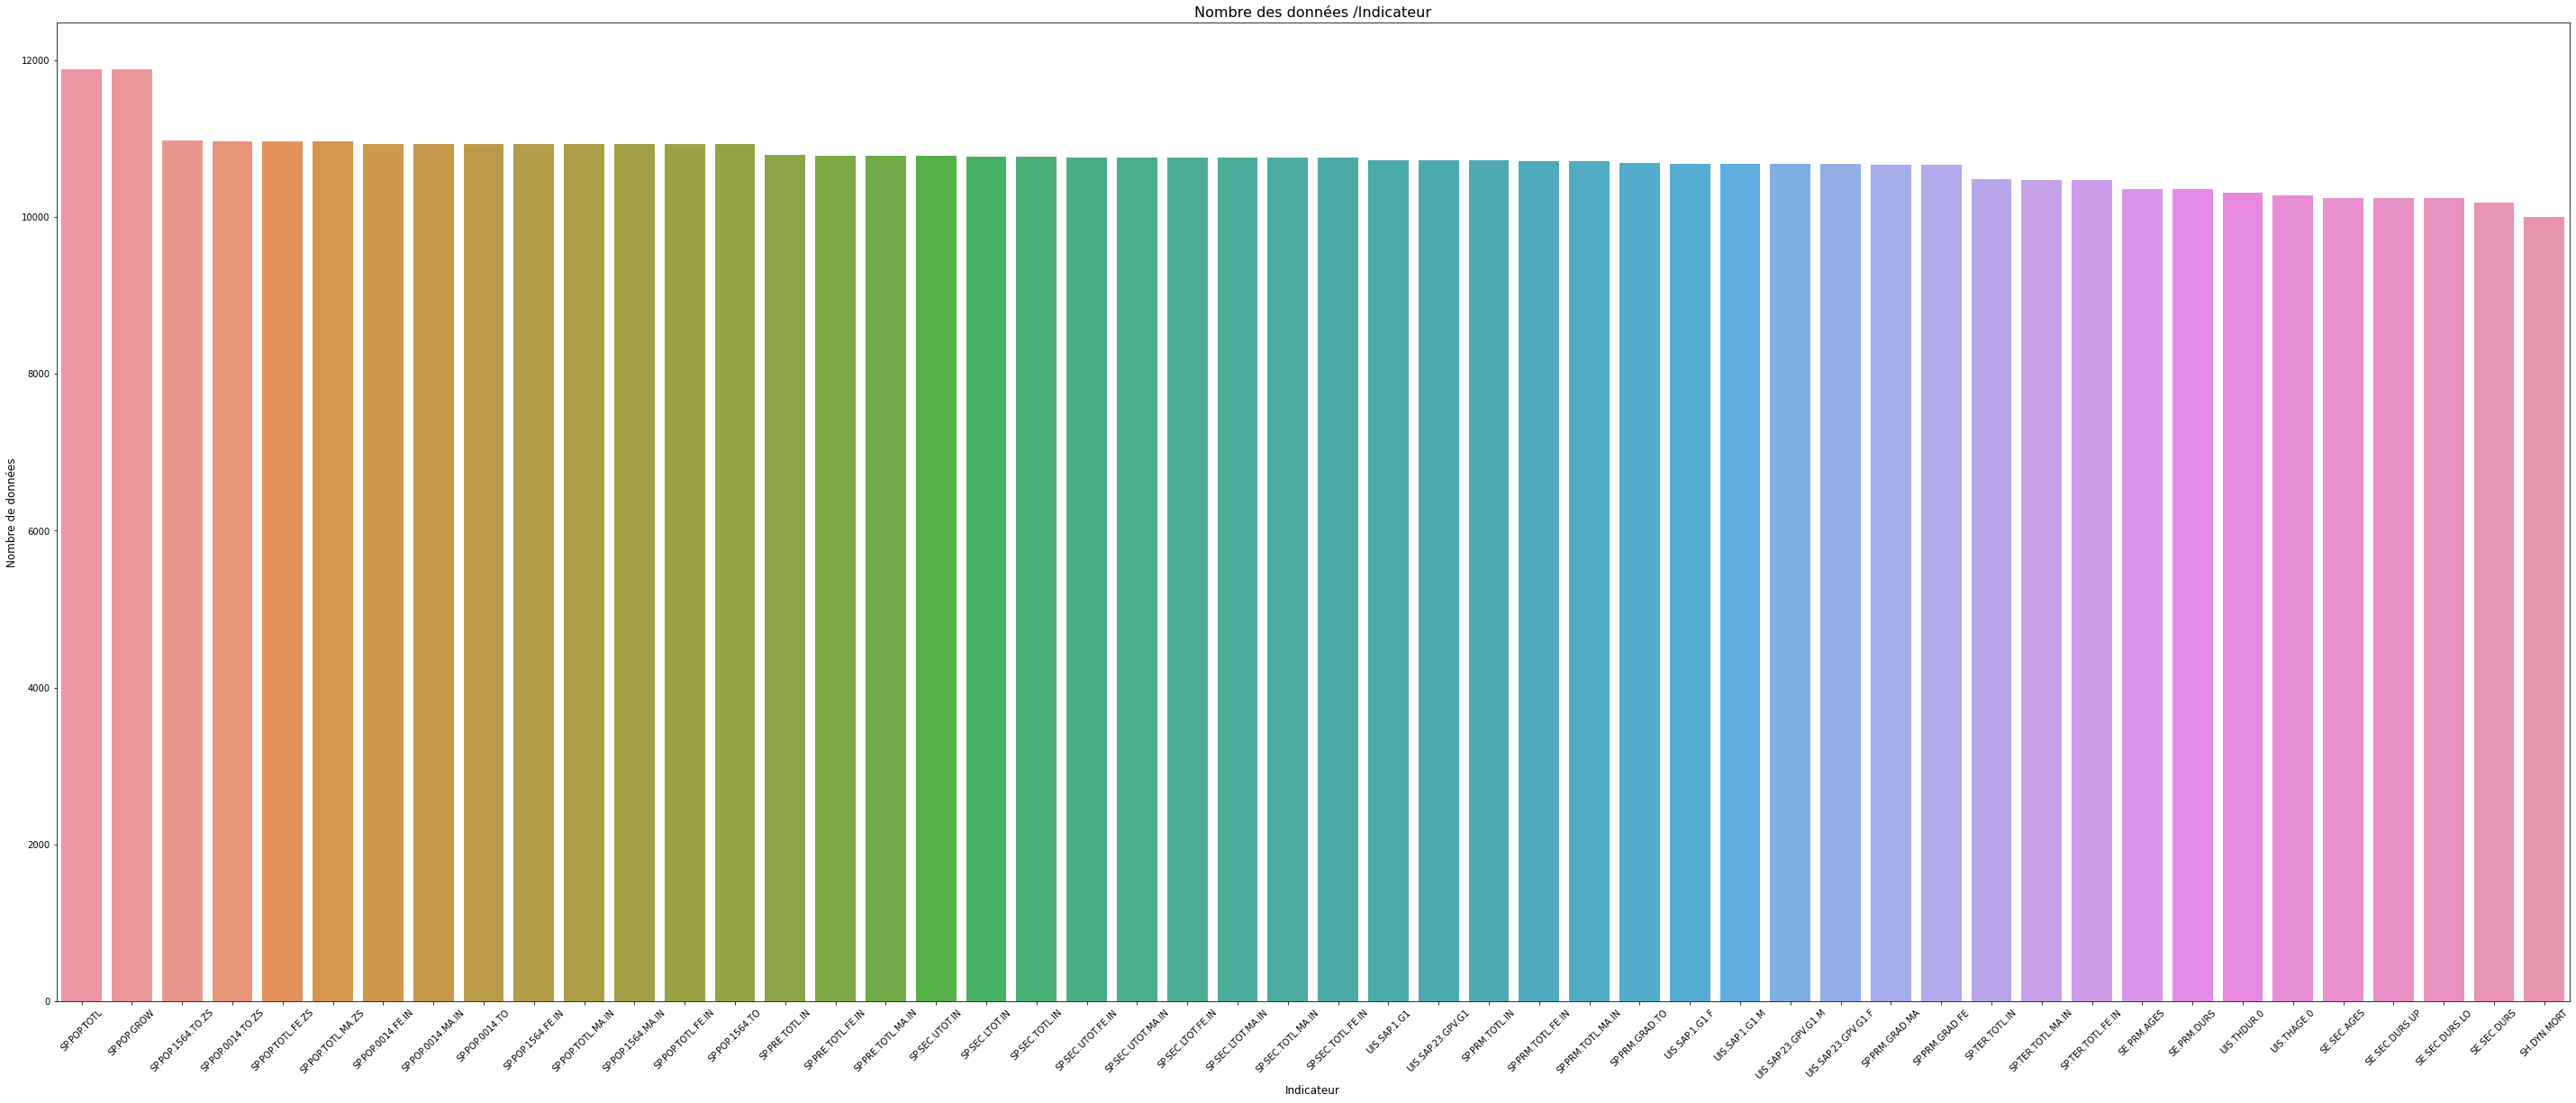

In [ ]:
Daf_Ind = Data_Ed.groupby('Indicator_Code')#on regroupe les pays par nombre de données
Daf_Ind = Daf_Ind.count().sum(axis=1)
Daf_Ind=Daf_Ind.sort_values(ascending=False)
Daf_Ind_premier=Daf_Ind.iloc[:50] #les 100 premiers
Daf_Ind_Derinier=Daf_Ind.iloc[-50:]# les 100 derniers

plt.figure(figsize=(50,20))
sns.barplot(Daf_Ind_premier.index, Daf_Ind_premier.values  )
plt.title('Nombre des données /Indicateur',size=16)
plt.ylabel('Nombre de données', fontsize=12)
plt.xlabel('Indicateur', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


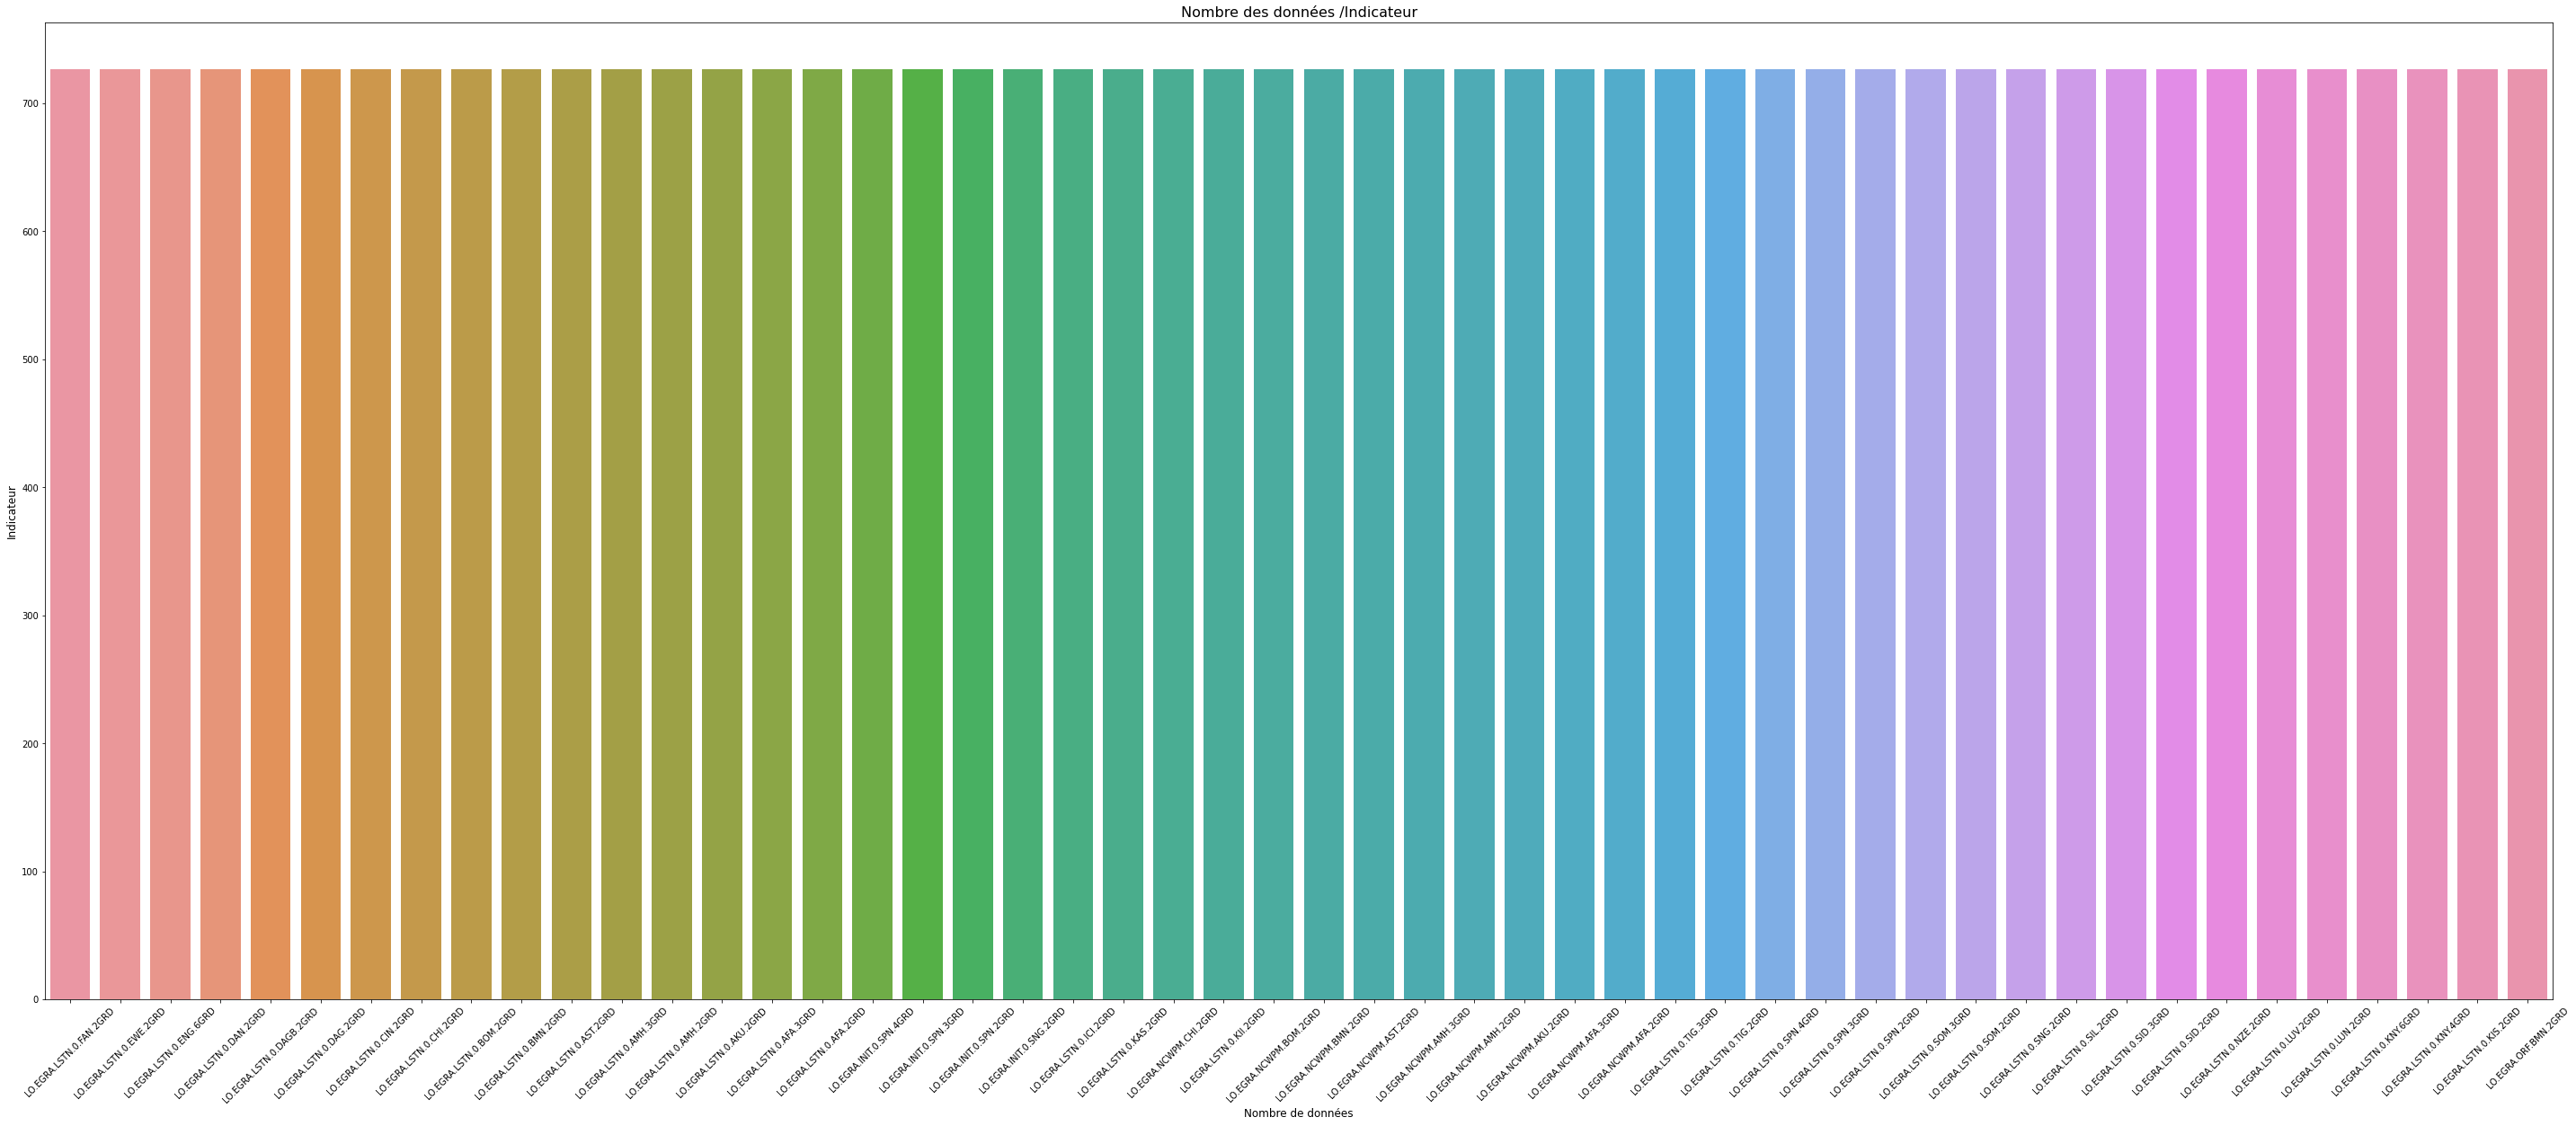

In [ ]:
plt.figure(figsize=(50,20))
sns.barplot( Daf_Ind_Derinier.index, Daf_Ind_Derinier.values )
plt.title('Nombre des données /Indicateur',size=16)
plt.ylabel('Indicateur', fontsize=12)
plt.xlabel('Nombre de données', fontsize=12)
plt.xticks(rotation=45)

plt.show()

Donc pour nettoyer notre jeux de données Data_Ed, il sera interessant de regarder les autres fichiers.

## Les autres Data: EdStatCountry.csv, EdStatsCountry-Series,EdStatsFootNote.csv, EdStatsSeries.csv

### `EdStatCountry.csv`

In [ ]:
Country.head(4)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006


In [ ]:
#les types de Variables de nos classes
Country.dtypes.value_counts() 

object     28
float64     3
dtype: int64

In [ ]:
Country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [ ]:
#Taux de valeurs manquantes sur notre data
(Country.isna().sum()/Country.shape[0]).sort_values

<bound method Series.sort_values of Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts       

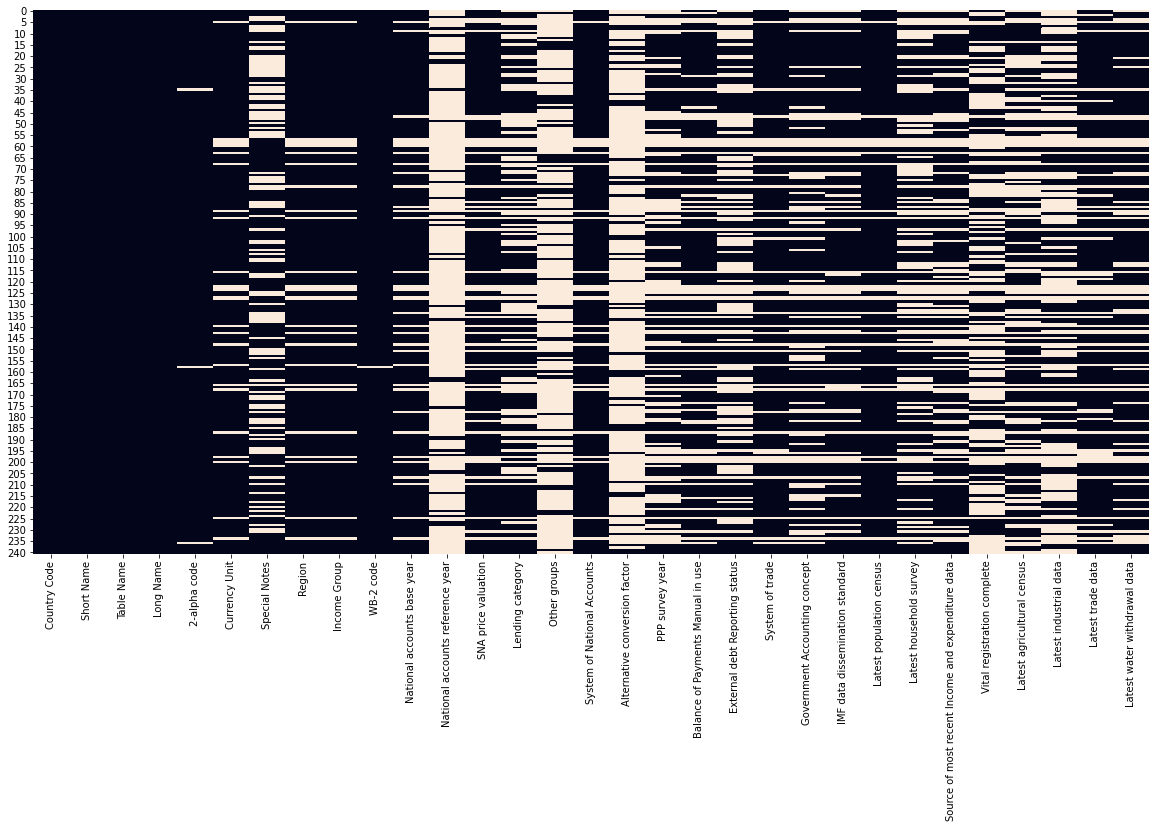

In [ ]:
# le heatmap des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(Country.isna(), cbar=False)

Sur ce jeu de données, on a peux de données manquantes. Mais pour notre projet on garde que 4 Variables.

In [ ]:
#renommer les Variables à garder 
Country = Country.rename(columns={'Country Code': 'Country_code', 'Table Name': 'Country_Name','Currency Unit':'currency_unit'})


In [ ]:
#on garde que ces Variables
Country=Country[['Country_code','Country_Name','currency_unit','Region']]


### EdStatsCountry-Series

In [ ]:
Country_series

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United Nations World Population Prospects",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [ ]:
#la taille
Country_series['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [ ]:
Country_series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [ ]:
#les types de Variables de nos classes
Country_series.dtypes.value_counts() 

object     3
float64    1
dtype: int64

In [ ]:
Country_series.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
#Taux de valeurs manquantes sur notre data
(Country_series.isna().sum()/Country_series.shape[0]).sort_values(ascending=True)


CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

Ce jeu de données n'a pas de valeur manquante ,il contient les informations sur les indicateurs de chaque pays : leurs source de données.  Il n'est pas interessant pour notre projet d'analyse de travailler avec cette data. 

### EdStatsFootNote

In [ ]:
Data_Note

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [ ]:
#la taille
Data_Note['SeriesCode'].unique().shape


(1558,)

In [ ]:
Data_Note.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [ ]:
#les types de Variables de nos classes
Data_Note.dtypes.value_counts() 

object     4
float64    1
dtype: int64

In [ ]:
Data_Note['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

In [ ]:
#Taux de valeurs manquantes sur notre data
(Data_Note.isna().sum()/Data_Note.shape[0]).sort_values(ascending=True)


CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

Ce jeu de données n'a pas de valeurs manquantes ,il contient les informations complémentaire sur les indicateurs de chaque pays : leurs source de données ainsi la methode de calcul de chaque indicateur. Il n'est pas interessant pour notre projet d'analyse de travailler avec cette data aussi.

### EdStatsSeries

In [ ]:
Data_Series.head(4)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data_Series['Series Code'].unique()


array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       ..., 'UIS.XUNIT.USCONST.56.FSGOV', 'XGDP.23.FSGOV.FDINSTADM.FFD',
       'XGDP.56.FSGOV.FDINSTADM.FFD'], dtype=object)

In [ ]:
#les types de Variables de nos classes
Data_Series.dtypes.value_counts()

object     15
float64     6
dtype: int64

In [ ]:
#la taille
Data_Series.shape

(3665, 21)

In [ ]:
Data_Series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [ ]:
#les types de Variables de nos classes
Data_Series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [ ]:
Data_Series.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Taux de valeurs manquantes sur notre data
(Data_Series.isna().sum()/Data_Series.shape[0]).sort_values(ascending=True)


Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Notes from original source             1.000000
License Type                           1.000000
Unit of measure                        1.000000
Other web links                        1.000000
Related indicators                     1.000000
Unnamed: 20                            1

Dans cette data, on a toutes les informations sur les indicateurs : définitions, statistiques, année d'apparition.... On remarque que :
- toutes les Variables quantitatives sont toutes manquantes.
- les Variables quantitatives ont un taux de remplissage élevé. 

Sur ce jeu de donnée on garde que :'Indicator_Code','Topic', 'Indicator_Name','Short_definition'

In [ ]:
#renommer les noms des Colonnes
Data_Series = Data_Series.rename(columns={'Series Code': 'Indicator_Code', 'Indicator Name': 'Indicator_Name','Short definition':'Short_definition'})
Data_Series=Data_Series[['Indicator_Code','Topic', 'Indicator_Name','Short_definition']]


## Conclusion:

La Data principale est EdStatData ; c'est à partir d'elle qu'on va tirer les conclusions et les informations demandées pour notre projet d'expansion à l'international de notre entreprise. Pour bien préparer notre Data et nos données, on aura besoin des autres jeux de données pour le nettoyage.

En étudiant les variables de chaque Data, on remarque que quelques variables se retrouvent dans plusieurs Datas (comme Country_Code, Indicator_Name).   

Donc pour filtrer et nettoyer les variables de DataEdStat, on aura besoin de la base de donnée Country et pour les Indicateurs, on aura besoin de la base de donnée Data_series

# **Partie 3** : Nettoyage 

## Approche méthodologique

Pour le nettoyage de notre base de donnée, on va suivre 3 étapes :
- nettoyage de la Variable qualitative Country_Name à partir de la dataframe Country
- Nettoyage de la Variable qualitative Indicator_Code à partir de la dataframe Data_Series
- Nettoyage des Variables quantitatives (années) on s'appuyant sur les valeurs manquantes 

## Nettoyage de la Variable qualitative Country_Name

In [ ]:
Country

,Country_code,Country_Name,currency_unit,Region
0,ABW,Aruba,Aruban florin,Latin America & Caribbean
1,AFG,Afghanistan,Afghan afghani,South Asia
2,AGO,Angola,Angolan kwanza,Sub-Saharan Africa
3,ALB,Albania,Albanian lek,Europe & Central Asia
4,AND,Andorra,Euro,Europe & Central Asia
5,ARB,Arab World,NaN,NaN
6,ARE,United Arab Emirates,U.A.E. dirham,Middle East & North Africa
7,ARG,Argentina,Argentine peso,Latin America & Caribbean
8,ARM,Armenia,Armenian dram,Europe & Central Asia
9,ASM,American Samoa,U.S. dollar,East Asia & Pacific


In [ ]:
Country['Country_Name']

0                                               Aruba
1                                         Afghanistan
2                                              Angola
3                                             Albania
4                                             Andorra
5                                          Arab World
6                                United Arab Emirates
7                                           Argentina
8                                             Armenia
9                                      American Samoa
10                                Antigua and Barbuda
11                                          Australia
12                                            Austria
13                                         Azerbaijan
14                                            Burundi
15                                            Belgium
16                                              Benin
17                                       Burkina Faso
18                          

On remarque que dans la liste des pays il y a des régions comme Europe, Arabic word..

On va  filtrer ces regions par Currency_Unit qui est Nan devant ces regions

In [ ]:
Country["currency_unit"] = Country.fillna(value={"currency_unit": 0}).currency_unit
Country = Country.drop(Country[Country.currency_unit == 0].index, axis=0)# On supprime les lignes où la monnaie est nulle.
#Réinitialiser les index du dataframe Country
Country = Country.reset_index(drop=True)
Country.head(2)

,Country_code,Country_Name,currency_unit,Region
0,ABW,Aruba,Aruban florin,Latin America & Caribbean
1,AFG,Afghanistan,Afghan afghani,South Asia


In [ ]:
Country.shape

(215, 4)

On a supprimé 26  observations de la variable Country_Name

On a 8 Régions dans notre data, on visualise le nombre des pays par Région :

> Bloc en retrait



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


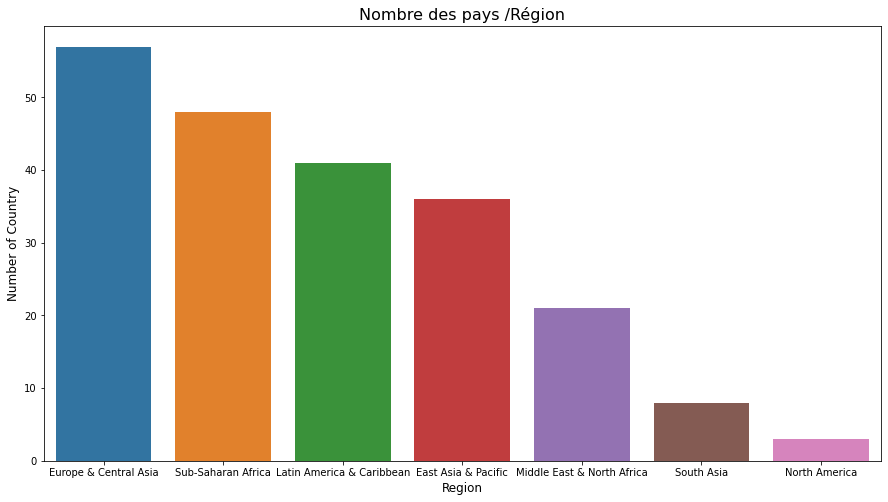

In [ ]:
region_count  = Country['Region'].value_counts()
#city_count = city_count[:10,]
plt.figure(figsize=(15,8))
sns.barplot(region_count.index, region_count.values)
plt.title('Nombre des pays /Région',size=16)
plt.ylabel('Number of Country', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


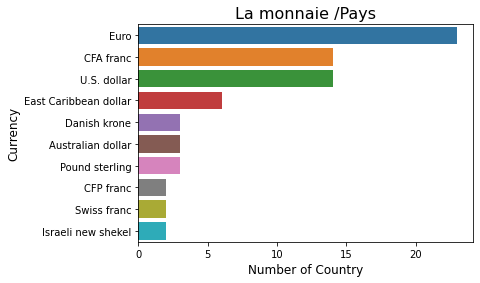

In [ ]:
#La monnaie la plus présente
currency_count  = Country['currency_unit'].value_counts()
currency_count = currency_count[:10,]# je prends les 10 premières valeurs
plt.figure()
sns.barplot(currency_count.values, currency_count.index)
plt.title('La monnaie /Pays',size=16)
plt.ylabel( 'Currency', fontsize=12)
plt.xlabel('Number of Country', fontsize=12)
plt.show()

## Nettoyage de la Variable qualitative Indicator

In [ ]:
Data_Series['Indicator_Name'].shape

(3665,)

In [ ]:
Data_Ed['Indicator_Name'].unique().shape

(3665,)

- On a le meme nombre d'indicateurs dans les deux Datas.

Pour filtrer les indicateurs, on etudi les topics :

In [ ]:
Data_Series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Pour notre projet, on garde que les Topic qui nous informent sur les pays sur les plans : téchnologique, économique, démographique et éducatif

In [ ]:
#Supprimer les topics non-pertinents
Topic_garder=['Infrastructure: Communications','Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita','Engaging the Private Sector (SABER)', 'Tertiary Education (SABER)', 'Secondary', 'Tertiary','Expenditures','Population','Education Management Information Systems (SABER)' ]
#Data_Series=Data_Series[Data_Series['Topic'].isin(Topic_garder)]
Data_Series.shape

(3665, 4)

On remarque que tous les indicateurs sont divisés en 3 catégories : Female, Male et Total(both) . Comme dans notre projet, le sexe de notre client ça n'apporte pas beaucoup d'information donc je garde que les indicateurs avec les valeurs "Total"

In [ ]:
# recherche des mots dans la Data et les extraire 
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "Totale"
        for word, val in dictionary.items():#dic c'est M
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result

In [ ]:
#la serie des mots à supprimer
M ={'female':'female', 'male':'male','Female':'Female','Male':'Male','FEMALE':'FEMALE', 'MALE':'MALE'  }
Data_Series['C']= detect_words(Data_Series['Indicator_Name'], M) #on rajoute une colonne avec la condition de la def pour après les supprimer 

Data_Series = Data_Series.drop(Data_Series[Data_Series.C != 'Totale'].index, axis=0)
Data_Series.shape


(2197, 5)

Maintenant je m'interesse au Topic :
Je regarde les significations de chaque topic sur ce lien :
https://datatopics.worldbank.org/education/indicators

J'étudie chaque Topics et garde que les indicateurs qui m'interessent

In [ ]:
#Pour l'affichage de chaque Topic
X = "Topic" 
Y = "Indicator_Name" 


def affichage (data,x,y,k):
    
     L=data[data[x].isin(k)]
     L[y].unique().tolist()
     return L

In [ ]:
#regarder les Indidateurs du topic 'Infrastructure: Communications'
Infrastructure={'Infrastructure: Communications'}
affichage(Data_Series,X,Y,Infrastructure)

,Indicator_Code,Topic,Indicator_Name,Short_definition,C
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Totale
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Totale


In [ ]:
#regarder les Indidateurs du topic 'Economic'
Economic={'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'}
affichage(Data_Series,X,Y,Economic)

,Indicator_Code,Topic,Indicator_Name,Short_definition,C
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,"GNI per capita, Atlas method (current US$)",NaN,Totale


### Conclusion

Après avoir analysé les indicateurs, j'ai gardé que 12 indicateurs selon leurs catégories dans l’ordre de leur importance et pertinence pour notre projet d’étude: 
 
1.   ** Clients potentielles ** : Pour connaître le nombre et l'évolution de notre cible de client dans chaque pays
    *   *SP.POP.GROW* : Taux de croissance démographique 
    *   *SP.POP.1524.TO.UN*  :Population, ages 15-24, total
    *   *UIS.E.3*:  Secondary Enrolment in upper secondary education, both 
 
    *   *UIS.E.4*:  Secondary Enrolment in post-secondary secondary non-tertiary education, both sexes (number)
    *   *SE.TER.ENRL*  :  Enrolment in tertiary education, all programmes.
 
2.   **Technique et Technologique** la Possibilités de déploiement dans le pays et pour savoir est ce que l'élève-étudiant a suffisamment des moyens techniques pour suivre sa formation à distance
     *   *IT.CMP.PCMP.P2*  :Personal computers (per 100 people)
     *   *IT.NET.USER.PE*  :Internet users (per 100 people)
 
    
3.   **Économie et Financière**: Ces indicateurs pour vérifier capacité des étudiants dans chaque pays de payer pour des services d'éducation privée
    *   *NY.GNP.PCAP.CD*  :GNI per capita, Atlas method (current US$)
 
4.   **Éducation**: ces indicateurs vont nous aider à connaitre  l'éducation en générale , le pourcentage d’éducateur / apprenant ainsi que  le marché de l'éducation privé dans le pays
 
    *   *UIS.PTRHC.56*:Pupil/teacher ratio in tertiary 
    *   *UIS.PTRHC.3*:Pupil/teacher ratio in upper secondary
    *   *SE.TER.PRIV.ZS*: Pourcentage of enrolment in tertiary in private institutions (%)
    *   *SE.SEC.PRIV.ZS* :Percentage of enrolment in secondary education in private institutions (%)


In [ ]:
Code_list=['NY.GNP.PCAP.CD','SP.POP.1524.TO.UN','SP.POP.GROW','SE.SEC.PRIV.ZS','SE.TER.PRIV.ZS','SE.TER.ENRL','UIS.E.4','UIS.E.3','IT.NET.USER.P2','IT.CMP.PCMP.P2','UIS.PTRHC.3','UIS.PTRHC.56']

## Nettoyage de la data Data_Ed

Revenons à notre base de données Data_Ed et on s'intéresse aux données quantitatives . Comme dans notre base de données, il y a beaucoup de valeurs manquantes donc on supprime:

- les pays supprimés de la data Country

- les indicateurs non choisis

-  des lignes entièrement vides

In [ ]:
Data_Ed=Data_Ed[Data_Ed['Country_Name'].isin(Country['Country_Name'])]
Data_Ed=Data_Ed[Data_Ed['Indicator_Code'].isin(Code_list)]
#Réinitialiser les index du dataframe 
Data_Ed = Data_Ed.reset_index(drop=True)


In [ ]:
#renomer les indicateurs
Data_Ed=Data_Ed.replace(['IT.NET.USER.P2', 'SP.POP.GROW', 'SP.POP.1524.TO.UN','IT.CMP.PCMP.P2','SE.TER.PRIV.ZS','SE.SEC.PRIV.ZS','NY.GNP.PCAP.CD','UIS.E.3','SE.TER.ENRL','UIS.E.4','UIS.PTRHC.56','UIS.PTRHC.3'],['Inter/100P','Taux_croissance', 'Pop_15_24','Ordi/100P','%Priv_Ter','%Priv_Sec','PIB','Insc_upp_Sec','Insc_Ter','Insc_post_Sec','%Apr/Prof_Ter','%Apr/Prof_Sec'])


**le taux de remplissage de chaque indicateur **

In [ ]:
Data_ind=Data_Ed.loc[:,"Indicator_Code":"2100"]
Data_ind = Data_ind.groupby('Indicator_Code')#on regroupe les indicateurs par nombre
Indicateurs_Nb = Data_ind.count()
Indicateurs_Nb

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
%Apr/Prof_Sec,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,2,2,2,2,11,22,29,39,29,43,87,80,79,83,84,81,78,74,78,82,87,77,82,81,85,84,66,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%Apr/Prof_Ter,22,68,68,70,76,73,70,62,63,73,72,79,68,78,75,74,85,76,62,66,73,70,72,71,78,68,70,55,42,102,103,97,100,94,97,89,92,89,90,99,97,105,107,100,95,71,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%Priv_Sec,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,97,94,96,109,103,108,113,116,116,119,119,128,133,129,128,129,112,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%Priv_Ter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,51,59,61,70,72,79,75,76,85,95,102,103,110,106,113,109,101,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Insc_Ter,37,120,110,111,107,111,109,110,111,119,118,136,122,119,122,118,132,116,116,123,123,123,116,110,102,109,105,81,86,131,123,122,132,134,133,129,129,128,133,133,138,140,140,129,122,106,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Insc_post_Sec,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,86,88,78,81,78,75,70,75,75,72,70,71,74,82,65,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Insc_upp_Sec,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,148,148,149,145,156,156,150,153,151,150,148,153,149,138,115,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inter/100P,7,0,0,0,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,202,39,50,65,91,136,169,178,183,190,192,193,195,189,192,194,193,200,199,198,198,200,198,198,198,198,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ordi/100P,1,0,0,0,0,1,1,1,1,1,2,4,3,4,4,6,7,8,42,42,61,65,70,78,90,109,115,130,150,157,161,180,180,177,177,169,99,48,27,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 69.0, ' Years')

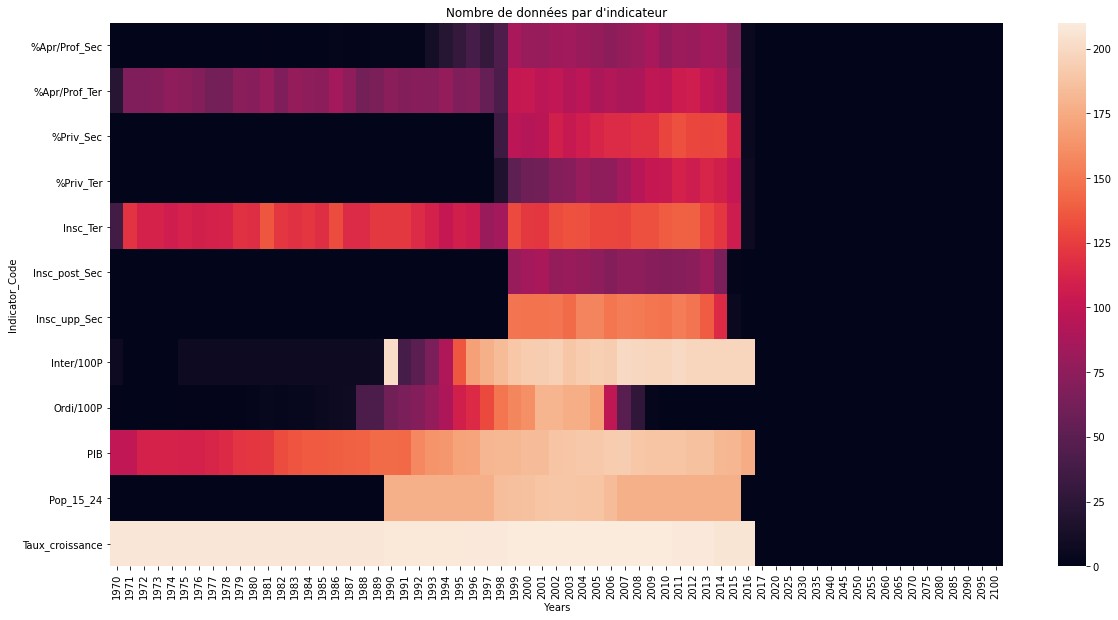

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Nombre de données par d\'indicateur')
ax = sns.heatmap(Indicateurs_Nb)
plt.xlabel ( ' Years' )

On remarque que 
- Certaines années sont mieux renseignées 
- [1999,2015] : bien renseigné
- [2016,2100]et[1970,1998] : peux ou pas renseigné
-Les deux indicateur les mieux reseignés sont: le PIB et le nombre d'inscrit dans l'éducation superieur



 Pour continuer, on supprime les lignes entièrement vides.

In [ ]:
# je verifie les colonnes entre 1970 et 2100 et on supprime les valeurs manquantes
Data_Ed = Data_Ed.dropna(how="all", subset=list(Data_Ed.loc[:,"1970":"2100"]))
list_year=pd.DataFrame(list(Data_Ed.loc[:,"1970":"2100"]),columns=['Année'])


In [ ]:
Data_Ed.shape

(2233, 70)

Maintenant, on a fini le nettoyage et on commence à s'intéresser à la validation des indicateurs choisis selon leurs valeurs et pertinence. Mais avant, il faut vérifier les périodes d'étude à choisir.

In [ ]:
Data_Ed.loc[:,"1970":"2100"].describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,3.740000e+02,4.950000e+02,4.950000e+02,4.990000e+02,5.010000e+02,5.090000e+02,5.040000e+02,5.000000e+02,5.040000e+02,5.280000e+02,5.280000e+02,5.570000e+02,5.390000e+02,5.500000e+02,5.520000e+02,5.490000e+02,5.790000e+02,5.550000e+02,5.760000e+02,5.930000e+02,9.920000e+02,8.290000e+02,8.540000e+02,8.850000e+02,9.340000e+02,1.008000e+03,1.057000e+03,1.041000e+03,1.132000e+03,1.622000e+03,1.627000e+03,1.646000e+03,1.683000e+03,1.667000e+03,1.690000e+03,1.667000e+03,1.585000e+03,1.553000e+03,1.549000e+03,1.539000e+03,1.535000e+03,1.569000e+03,1.558000e+03,1.547000e+03,1.483000e+03,1.227000e+03,611.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.941413e+04,5.712340e+04,5.174932e+04,5.880554e+04,5.620459e+04,6.005169e+04,7.674254e+04,7.247398e+04,7.513247e+04,7.512010e+04,7.814690e+04,8.334586e+04,8.174661e+04,8.448335e+04,8.627886e+04,8.884639e+04,9.798846e+04,9.429481e+04,9.779529e+04,9.889937e+04,1.064645e+06,1.286552e+06,1.247178e+06,1.206159e+06,1.154503e+06,1.083377e+06,1.038021e+06,1.042302e+06,9.839666e+05,7.924287e+05,8.016369e+05,8.098169e+05,8.185370e+05,8.490792e+05,8.392209e+05,8.651420e+05,9.396429e+05,9.842731e+05,1.003319e+06,1.022841e+06,1.027354e+06,1.024147e+06,1.038276e+06,1.051515e+06,1.034675e+06,1.119369e+06,5866.622478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.712867e+05,4.794635e+05,4.810506e+05,5.092283e+05,5.081941e+05,5.315146e+05,5.950798e+05,5.879884e+05,6.009164e+05,5.889710e+05,6.027843e+05,6.153706e+05,6.300652e+05,6.339945e+05,6.412952e+05,6.410629e+05,6.399449e+05,6.620107e+05,6.575471e+05,6.645262e+05,9.936563e+06,1.082930e+07,1.058826e+07,1.029030e+07,9.908744e+06,9.455151e+06,9.171237e+06,9.187333e+06,8.807956e+06,7.447304e+06,7.505107e+06,7.565059e+06,7.628484e+06,7.832860e+06,7.906910e+06,8.099961e+06,8.475182e+06,8.671908e+06,8.776454e+06,8.860242e+06,8.908928e+06,8.835661e+06,8.864222e+06,8.859032e+06,8.901702e+06,9.644358e+06,31245.310487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-5.924733e+00,-1.095515e+01,-3.582128e+00,-2.143728e+00,-2.170699e+00,-1.969444e+00,-2.643577e+00,-2.966054e+00,-3.278564e+00,-3.589465e+00,-3.561055e+00,-3.332301e+00,-3.333512e+00,-2.628656e+00,-2.147571e+00,-3.040564e+00,-3.107229e+00,-2.467847e+00,-1.797539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.883126e+00,2.332201e+00,2.396201e+00,2.388699e+00,2.381280e+00,2.283472e+00,2.228341e+00,2.238144e+00,2.243153e+00,2.390207e+00,2.406928e+00,2.441402e+00,2.461505e+00,2.528832e+00,2.558683e+00,2.548689e+00,2.574351e+00,2.462462e+00,2.137058e+00,2.224559e+00,3.311190e-01,2.362697e+00,2.233755e+00,2.044508e+00,1.723373e+00,1.451651e+00,1.317238e+00,1.253502e+00,1.528143e+00,2.897593e+00,3.507540e+00,3.440211e+00,4.079797e+00,4.395242e+00,5.423799e+00,5.946424e+00,7.546960e+00,8.846370e+00,9.747470e+00,1.020339e+01,1.104393e+01,1.145917e+01,1.155026e+01,1.150620e+01,1.092648e+01,9.005935e+00,2.015983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.131473e+00,1.203038e+01,1.277955e+01,1.236667e+01,1.259936e+01,1.218750e+01,1.178568e+01,1.241624e+01,1.210231e+01,1.252469e+01,1.215928e+01,1.320762e+01,1.392039e+01,1.415034e+01,1.672281e+01,1

In [ ]:
Data_Ed['Country_Name'].unique().shape

(210,)

In [ ]:
#Taux de valeurs manquantes sur notre data
(Data_Ed.isna().sum()/Data_Ed.shape[0]).sort_values(ascending=True)


Country_Name      0.000000
Country_code      0.000000
Indicator_Name    0.000000
Indicator_Code    0.000000
2004              0.243171
2002              0.246305
2005              0.253471
2003              0.253471
2001              0.262875
2000              0.271384
1999              0.273623
2006              0.290193
2011              0.297358
2012              0.302284
2007              0.304523
2008              0.306314
2013              0.307210
2009              0.310793
2010              0.312584
2014              0.335871
2015              0.450515
1998              0.493059
1996              0.526646
1997              0.533811
1995              0.548589
1990              0.555755
1994              0.581729
1993              0.603672
1992              0.617555
1991              0.628751
2016              0.726377
1989              0.734438
1986              0.740708
1988              0.742051
1981              0.750560
1987              0.751455
1984              0.752799
1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


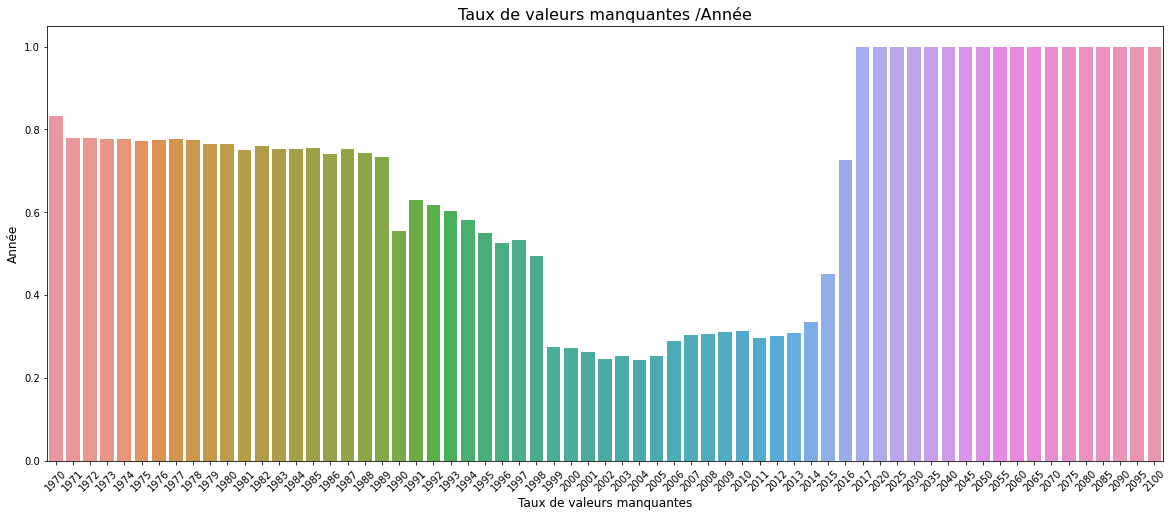

In [ ]:

year_count  = Data_Ed.loc[:,"1970":"2100"].isna().sum()/Data_Ed.shape[0]
plt.figure(figsize=(20,8))
sns.barplot(year_count.index, year_count.values)
plt.title('Taux de valeurs manquantes /Année',size=16)
plt.xticks(rotation= 45)# pour faire pivoter le texte de l’étiquette Xticks
plt.ylabel('Année', fontsize=12)
plt.xlabel('Taux de valeurs manquantes', fontsize=12)
plt.show()

D'après le graphe, on remarque :

- à partir du 2017 on a une absence des données, donc on peut supprimer les colonnes de 2020 jusqu'à 2100 

- un taux assez haux de 1970 jusqu'à 1998

In [ ]:
Data_Ed

,Country_Name,Country_code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Afghanistan,AFG,"Enrolment in post-secondary non-tertiary education, both sexes (number)",Insc_post_Sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051600e+04,NaN,NaN,NaN,NaN,3.438000e+04,3.138600e+04,5.169400e+04,7.696900e+04,9.070000e+04,1.202160e+05,1.452200e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",Insc_Ter,7732.000000,9409.000000,9817.000000,11487.000000,10956.000000,12256.000000,14214.000000,16147.000000,21118.000000,22974.000000,NaN,NaN,19652.000000,NaN,NaN,NaN,22306.000000,17509.000000,NaN,NaN,2.433300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.621100e+04,2.764800e+04,NaN,NaN,NaN,NaN,9.518500e+04,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Enrolment in upper secondary education, both sexes (number)",Insc_upp_Sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.599520e+05,NaN,1.155830e+05,1.733560e+05,1.901040e+05,2.711440e+05,2.852900e+05,3.611930e+05,4.430020e+05,5.673440e+05,7.434050e+05,8.814150e+05,9.692670e+05,9.687690e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,"GNI per capita, Atlas method (current US$)",PIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.100000e+02,2.500000e+02,2.700000e+02,3.300000e+02,3.600000e+02,4.600000e+02,5.000000e+02,5.600000e+02,6.700000e+02,6.700000e+02,6.300000e+02,5.900000e+02,570.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Internet users (per 100 people),Inter/100P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,10.595726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Zimbabwe,ZWE,Percentage of enrolment in tertiary education in private institutions (%),%Priv_Ter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.281775e+01,1.304604e+01,NaN,NaN,NaN,6.922370e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,Zimbabwe,ZWE,Personal computers (per 100 people),Ordi/100P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.911720e-02,4.658509e-02,1.183834e-01,1.605594e-01,1.924986e-01,2.835206e-01,6.753272e-01,9.131804e-01,1.063003e+00,1.211169e+00,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,6.687338e+00,6.798012e+00,NaN,7.431140e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,Zimbabwe,ZWE,Population growth (annual %),Taux_croissance,3.261985,

In [ ]:
Data_Education=Data_Ed.loc[:,"Country_Name":"2017"]
Sup=Data_Education.loc[:,"1970":"1998"]
Data_Education.drop(Sup,axis='columns', inplace=True)



In [ ]:
Data_Education['Indicator_Code'].unique()

array(['Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec', 'PIB', 'Inter/100P',
       '%Priv_Sec', '%Priv_Ter', 'Ordi/100P', 'Taux_croissance',
       'Pop_15_24', '%Apr/Prof_Ter', '%Apr/Prof_Sec'], dtype=object)

### Nombre de données par pays

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


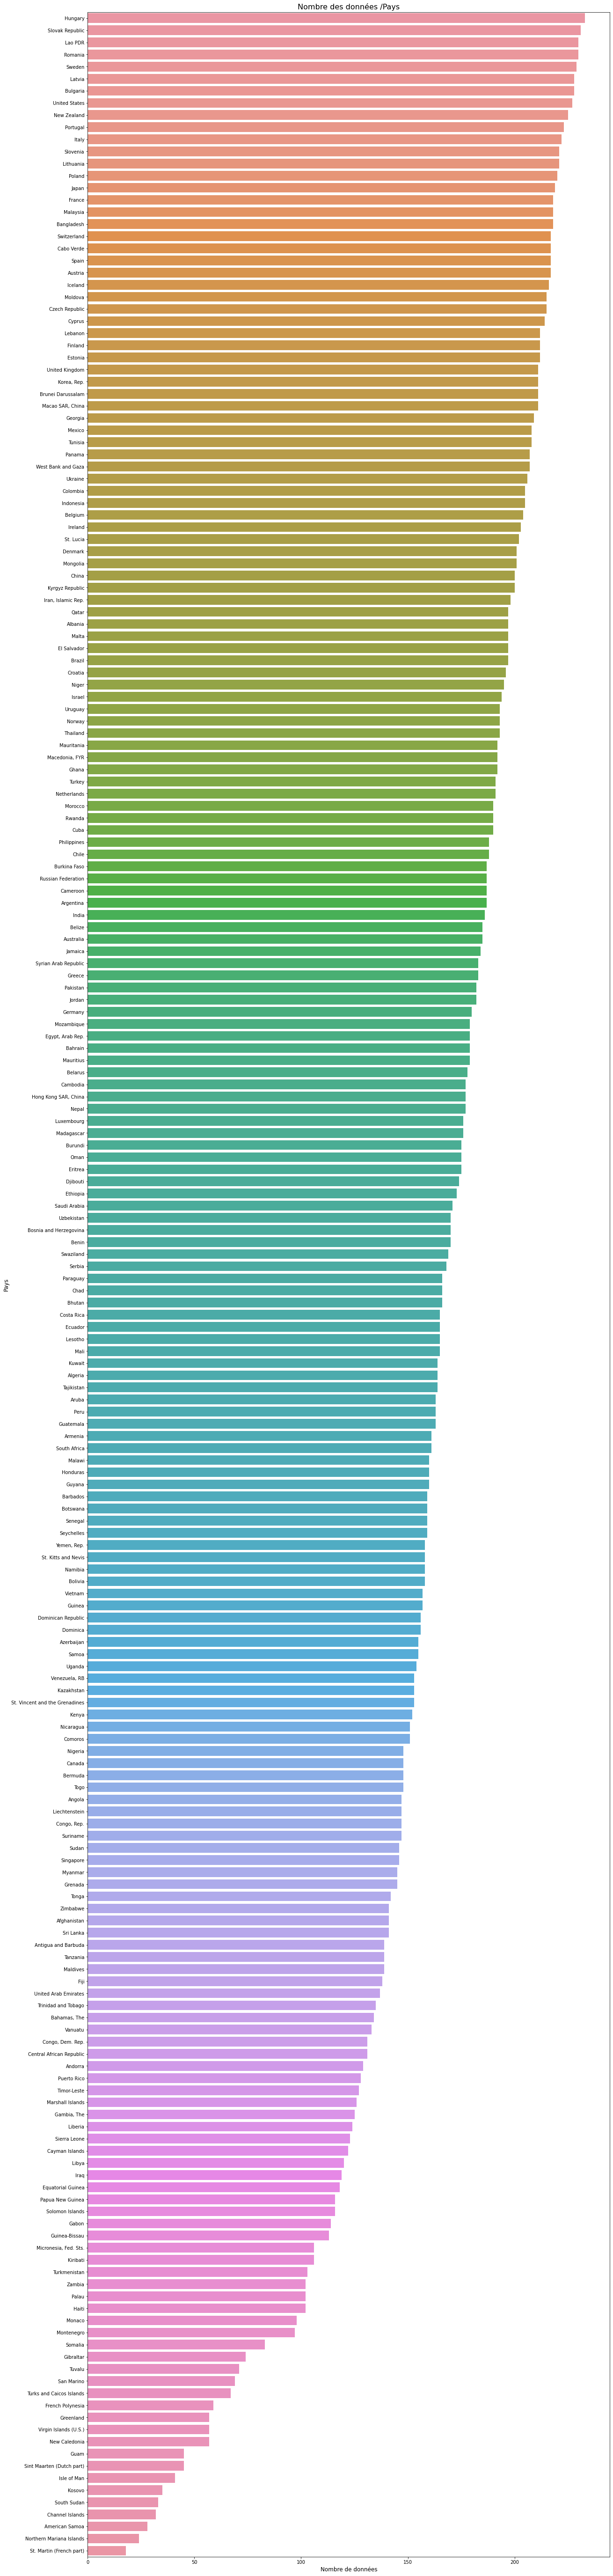

In [ ]:
Data_country = Data_Education.groupby('Country_Name')#on regroupe les pays par nombre de données
Country_Nb = Data_country.count()
Country_Nb=Country_Nb.sum(axis=1)
Country_Nb=Country_Nb.sort_values(ascending=False)

plt.figure(figsize=(20,100))
sns.barplot(Country_Nb.values, Country_Nb.index )
plt.title('Nombre des données /Pays',size=16)
plt.ylabel('Pays', fontsize=12)
plt.xlabel('Nombre de données', fontsize=12)
plt.show()


On remarque qu'il y a des pays qui ont moins de 100 valeurs d'indicateurs sur la durée d'étude, il sera mieux de les supprimer de la data.

In [ ]:
Pays_garde=Country_Nb[(Country_Nb.values > 100)]
Data_Education=Data_Education[Data_Education['Country_Name'].isin(Pays_garde.index)]
Data_Education['Country_Name'].unique().shape



(190,)

## Imputation des Valeurs  nulles

Pour avoir une data avec maximum de valeur, j'ai choisi de remplir les valeurs manquantes par la dernière valeur non nulle.

In [ ]:
Df=Data_Education.copy()

In [ ]:
#On utilis la fonction ffill pour trouver la dernière valeurs non null sur notre Data
#https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/  lien 
#df.ffill(axis=1) : il remplasse toutes valeurs Nan par la dernière valeur Non null
#df['LastValue'] = df.iloc[:, 1:].ffill(axis=1).iloc[:, -1]#ici on crée une colonne avec les dernières valeurs non nulles
#Remplire les valeurs manquantes par la dernière valeur non nulle

Df1=Df.loc[:,"1999":"2017"].ffill(axis=1)
Df1=Df1.fillna(method='bfill',axis=1) #il reste des valeurs nulles donc on prend la première valeur qui apparu

Df2=Df.loc[:,'Country_Name':'Indicator_Code']
Data_Education=pd.concat([Df2,Df1],axis=1)
 



In [ ]:
Data_Education.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03,2.120000e+03
mean,6.255732e+05,6.356937e+05,6.481048e+05,6.630164e+05,6.797793e+05,6.930378e+05,7.053233e+05,7.217208e+05,7.335073e+05,7.461165e+05,7.541438e+05,7.628876e+05,7.715187e+05,7.770234e+05,7.814639e+05,7.854886e+05,7.852367e+05,7.851959e+05,7.851959e+05
std,6.527827e+06,6.586324e+06,6.676964e+06,6.804765e+06,6.953814e+06,7.092670e+06,7.216095e+06,7.341954e+06,7.434327e+06,7.514360e+06,7.561722e+06,7.595999e+06,7.613784e+06,7.612108e+06,7.581288e+06,7.556766e+06,7.522893e+06,7.522896e+06,7.522896e+06
min,-9.525092e-01,-2.850973e+00,-1.990632e+00,-2.170699e+00,-1.474533e+00,-1.302692e+00,-1.628401e+00,-1.596378e+00,-1.477223e+00,-1.666383e+00,-1.651025e+00,-2.096943e+00,-2.628656e+00,-2.147571e+00,-3.040564e+00,-3.107229e+00,-2.467847e+00,-1.797539e+00,-1.797539e+00
25%,5.040377e+00,5.616552e+00,6.123633e+00,6.876639e+00,7.498811e+00,7.986586e+00,8.513258e+00,8.939490e+00,9.438393e+00,9.745340e+00,9.949421e+00,1.052048e+01,1.071257e+01,1.084312e+01,1.122097e+01,1.131862e+01,1.153113e+01,1.168736e+01,1.168736e+01
50%,2.736412e+01,2.786715e+01,2.853780e+01,2.913371e+01,3.023909e+01,3.107533e+01,3.312578e+01,3.348055e+01,3.506223e+01,3.771428e+01,3.847296e+01,4.021396e+01,4.129518e+01,4.308156e+01,4.585000e+01,4.914000e+01,5.008697e+01,5.158803e+01,5.158803e+01
75%,1.634750e+04,1.599350e+04,1.752775e+04,1.783425e+04,1.885175e+04,2.085400e+04,2.266400e+04,2.329725e+04,2.355550e+04,2.512700e+04,2.603600e+04,2.765925e+04,2.863750e+04,2.744575e+04,2.779225e+04,2.882850e+04,2.850625e+04,2.809075e+04,2.809075e+04
max,1.986793e+08,2.013744e+08,2.049524e+08,2.084370e+08,2.118642e+08,2.152883e+08,2.187384e+08,2.222242e+08,2.257010e+08,2.290762e+08,2.322260e+08,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08,2.441202e+08,2.441202e+08


In [ ]:
Data_Education

,Country_Name,Country_code,Indicator_Name,Indicator_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Enrolment in post-secondary non-tertiary education, both sexes (number)",Insc_post_Sec,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,3.438000e+04,3.138600e+04,5.169400e+04,7.696900e+04,9.070000e+04,1.202160e+05,1.452200e+05,1.452200e+05,1.452200e+05,1.452200e+05
1,Afghanistan,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",Insc_Ter,2.621100e+04,2.621100e+04,2.621100e+04,2.621100e+04,2.621100e+04,2.764800e+04,2.764800e+04,2.764800e+04,2.764800e+04,2.764800e+04,9.518500e+04,9.518500e+04,9.750400e+04,9.750400e+04,9.750400e+04,2.628740e+05,2.628740e+05,2.628740e+05,2.628740e+05
2,Afghanistan,AFG,"Enrolment in upper secondary education, both sexes (number)",Insc_upp_Sec,1.599520e+05,1.599520e+05,1.599520e+05,1.599520e+05,1.155830e+05,1.733560e+05,1.901040e+05,2.711440e+05,2.852900e+05,3.611930e+05,4.430020e+05,5.673440e+05,7.434050e+05,8.814150e+05,9.692670e+05,9.687690e+05,9.687690e+05,9.687690e+05,9.687690e+05
3,Afghanistan,AFG,"GNI per capita, Atlas method (current US$)",PIB,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.500000e+02,2.700000e+02,3.300000e+02,3.600000e+02,4.600000e+02,5.000000e+02,5.600000e+02,6.700000e+02,6.700000e+02,6.300000e+02,5.900000e+02,5.700000e+02,5.700000e+02
4,Afghanistan,AFG,Internet users (per 100 people),Inter/100P,4.722568e-03,4.722568e-03,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,1.059573e+01,1.059573e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Zimbabwe,ZWE,Percentage of enrolment in tertiary education in private institutions (%),%Priv_Ter,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.304604e+01,1.304604e+01,1.304604e+01,1.304604e+01,6.922370e+00,6.922370e+00,6.922370e+00
2515,Zimbabwe,ZWE,Personal computers (per 100 people),Ordi/100P,1.211169e+00,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,6.687338e+00,6.798012e+00,6.798012e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00
2516,Zimbabwe,ZWE,Population growth (annual %),Taux_croissance,1.429746e+00,1.298782e+00,1.170597e+00,1.080653e+00,1.061280e+00,1.130323e+00,1.263909e+00,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,2.336070e+00,2.336070e+00
2517,Zimbabwe,ZWE,"Population, ages 15-24, total",Pop_15_24,2.835009e+06,2.921453e+06,3.003420e+06,3.080565e+06,3.151277e+06,3.213812e+06,3.266903e+06,3.309907e+06,3.342927e+06,3.366486e+06,3.381553e+06,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3.354236e+06,3.333716e+06,3.333716e+06,3.333716e+06


In [ ]:
Data_Education['Indicator_Code'].unique()

array(['Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec', 'PIB', 'Inter/100P',
       '%Priv_Sec', '%Priv_Ter', 'Ordi/100P', 'Taux_croissance',
       'Pop_15_24', '%Apr/Prof_Ter', '%Apr/Prof_Sec'], dtype=object)

In [ ]:
(Data_Education.isna().sum()/Data_Education.shape[0]).sort_values(ascending=True)


Country_Name      0.000000
Country_code      0.000000
Indicator_Name    0.000000
Indicator_Code    0.000000
2015              0.009346
2014              0.009346
2013              0.009346
2012              0.009346
2011              0.009346
2010              0.009346
2009              0.009346
2008              0.009346
2006              0.009346
2016              0.009346
2005              0.009346
2004              0.009346
2003              0.009346
2002              0.009346
2001              0.009346
2000              0.009346
1999              0.009346
2007              0.009346
2017              0.009346
dtype: float64

In [ ]:
(Data_Education.isna().sum()/Data_Education.shape[0]).count()

23

# Sauvegarde de la DataFrame nettoyée

In [ ]:
# Enregistrement au format CSV
Data_Education.to_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data_Education.csv',index=False)